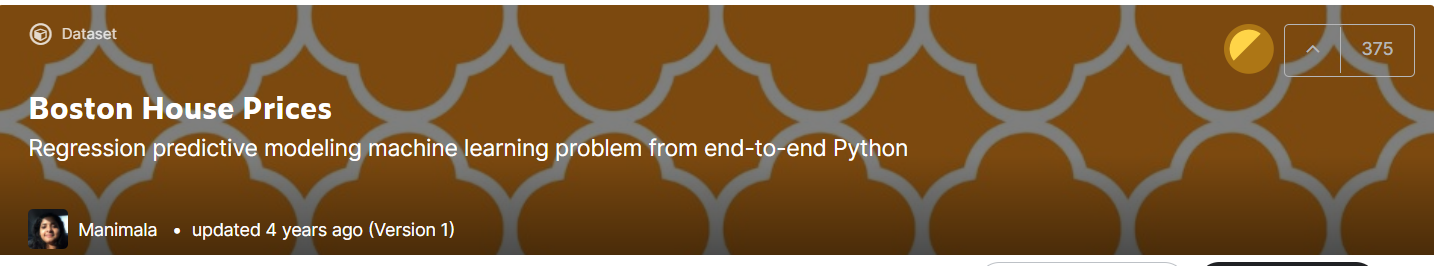

ref) https://www.kaggle.com/prasadperera/the-boston-housing-dataset

### 1. Data Load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,LassoCV
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.linear_model import Ridge,RidgeCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVC

from sklearn.metrics import mean_squared_error,mean_squared_log_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
data_dict = load_boston()
data_dict.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [3]:
data_dict['target'][:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [4]:
data_dict['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

#### 데이터 프레임 만들기

In [5]:
df = pd.DataFrame(data=data_dict['data'],columns=data_dict['feature_names'])
df['price']=data_dict['target']
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


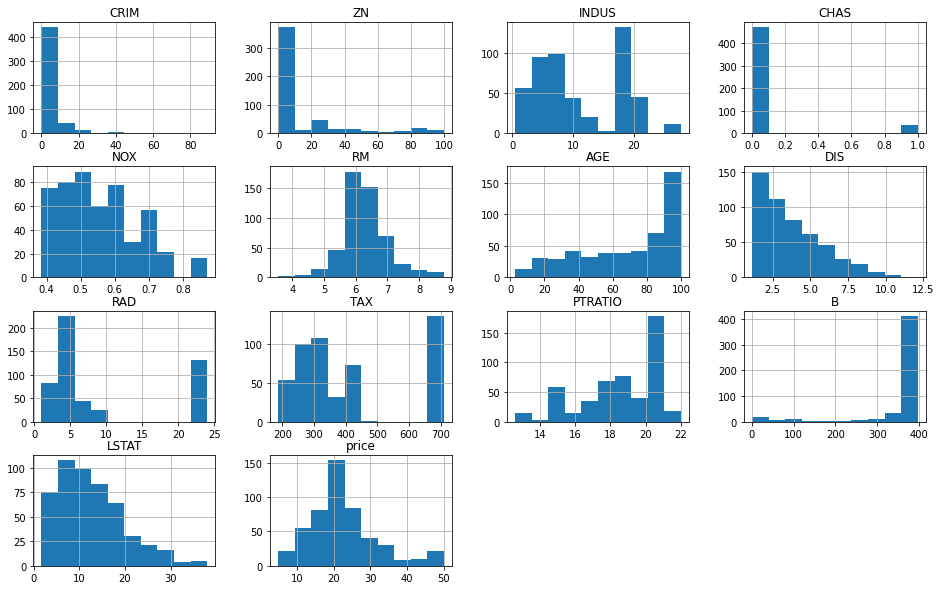

In [8]:
df.hist(figsize=(16,10))
plt.show()

_____________________________________________________________

### 2. EDA

### 3. Feature Engineering

#### 상관분석 / 다중공선성

다중공선성을 확인 하는 방법은 크게 3가지가 있습니다. 
 
* Heatmap 그래프를 통한 확인
* Scatter plot을 통한 확인 
* VIF(Variance Inflation Factors, 분산팽창요인)을 통한 확인 

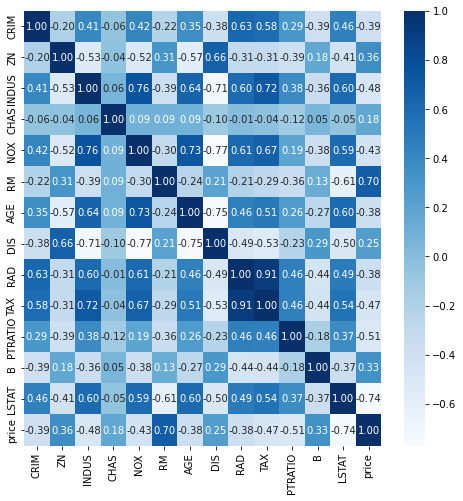

In [9]:
#Heatmap 그래프를 통한 확인
fig, ax = plt.subplots(figsize=(8,8)) 
#plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='Blues')
plt.show()

* feature간 유기적 관계가 있다.
* 다중공선성: tax-rad 해결: rad을 drop or tax+rad = PCA
* (+) rm  (-) lstat

In [10]:
#VIF(Variance Inflation Factors, 분산팽창요인)을 통한 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['vif_factor']= [variance_inflation_factor(df.values, i) 
                    for i in range(df.shape[1])]

vif['feature'] = df.columns
vif = vif.sort_values('vif_factor').reset_index(drop=True)
# drop=True 옵션을 지정해주면 인덱스로 지정은 하되, 기존열을 남겨놓는다.
vif

,vif_factor,feature
0,1.176266,CHAS
1,2.131404,CRIM
2,2.910004,ZN
3,12.615188,LSTAT
4,14.485874,INDUS
5,15.369980,RAD
6,15.430455,DIS
7,21.351015,B
8,21.398863,AGE
9,24.503206,price


#### outlier

In [ ]:
f,ax = plt.subplots(1,2,figsize=(10,3))
sns.boxplot(x=df['rm'],ax=ax[0])
sns.boxplot(x=df['lstat'],ax=ax[1])
plt.show()

#### 정규분포화(스케일링)

- df전체를 대상으로 할 예정
- target도 스케일링 but 이후 원본으로 복원시켜야 함
- target은 로그 변환 + 스케일링 둘다 한다.

In [ ]:
df['price'].hist(figsize=(4,2))
plt.show()

In [ ]:
#로그 스케일링 > feature 특징이 사라지는 경우가 있으므로 조심! 
df['price'] = np.log1p(df['price'])

#### 방법1) df전체 스케일링

In [ ]:
# from sklearn.preprocessing import StandardScaler

# st = StandardScaler()
# st.fit(df)
# df_scaler = st.transform(df) #df전체 대상 스케일링

#### 방법 2) 왜도,첨도가 심한 feature들만 스케일링 (target 포함)

In [ ]:
# 왜도
df.skew()

In [ ]:
#왜도가 2 이상인 컬럼 추출 > 스케일링
col_list = df.skew()[df.skew()>2].index
col_list = ['crim', 'zn', 'chas', 'price']
scaler = StandardScaler()
df[col_list]=scaler.fit_transform(df[col_list])
df.head()

### 다중공선성 처리 
- 방법1) 스케일링, 이상치 처리 후 PCA
- 방법2) 컬럼 DROP (target과 상관도가 적은 컬럼 버리기)

In [ ]:
#방법1
sns.scatterplot(data=df, x="tax", y="rad")

In [ ]:
df.shape

In [ ]:
drop_idx = df[df['tax'] >= 600].index.tolist()
df = df.drop(drop_idx, axis=0)

In [ ]:
df.shape

In [ ]:
sns.scatterplot(data=df[df['tax']<=600], x="tax", y="rad")
plt.show()

In [ ]:
#방법2
# df = df.drop(['rad'],axis=1)
# df.shape

### 모델 학습 및 평가

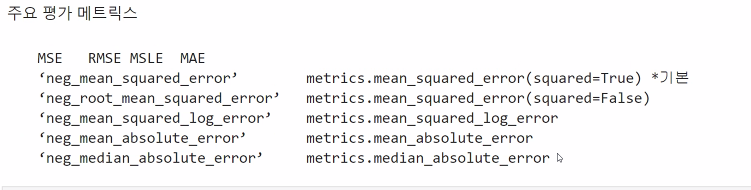

In [ ]:
def fit_score(df):

    X= df[df.columns.difference(['price'])]
    y= df["price"]

    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

    model_list = [LinearRegression(),Lasso(),ElasticNet(),Ridge(),XGBRegressor(),LGBMRegressor()]

    for model in model_list:
        model.fit(X_train,y_train)
        pred= model.predict()
        myscore(y_test,pred)
        
        mse = mean_squared_error(y_test,pred)
        print(f'MSE:{mse:.4f}')

### 검증 및 튜닝

In [12]:
df.to_csv("./after_eng.csv",index=False)

In [13]:
df=pd.read_csv("./after_eng.csv")

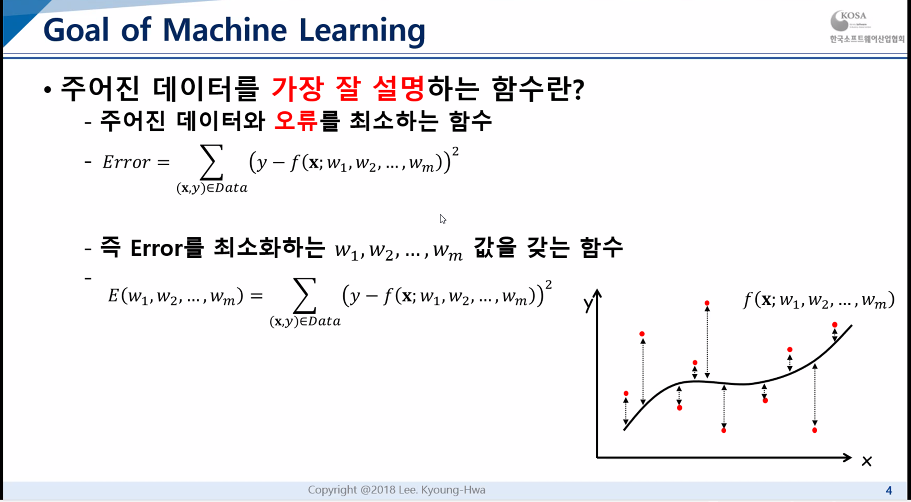

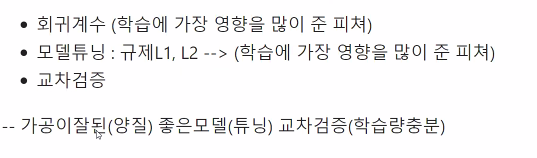

### 회귀계수 (학습에 가장 영향을 많이 준 feature)
- fit() 이후에 학습 가능

- 회귀함수 == f(X) = wX+b(0)
- coefficient: 계수 / coef_(회귀계수) = W(weight:가중치)=기울기
- bias = intercept = 절편

- Linear Model: coef_,intercept_
- Tree Model: coef_, intercept_ , feature_importances_

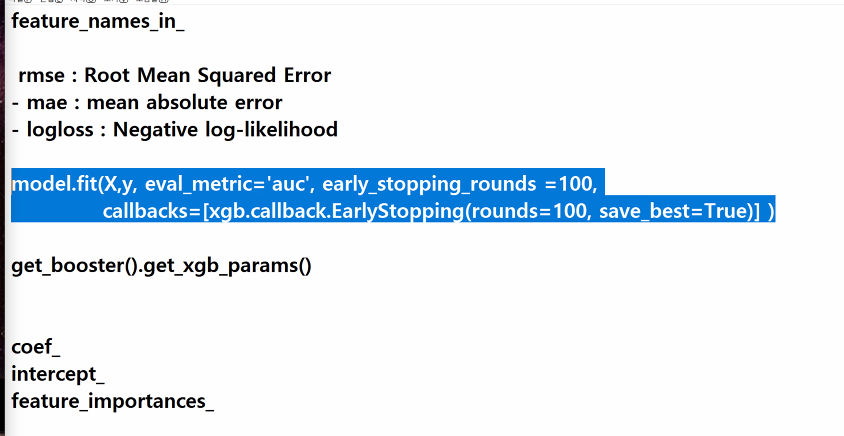


#### 연습용

In [20]:
X= df[df.columns.difference(['price'])]
y= df["price"]

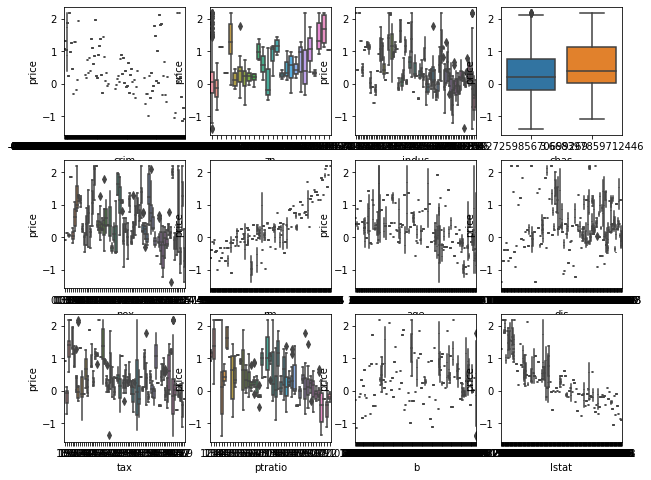

In [41]:
# /: 나누기, %:나머지, //:몫
col_list=df.columns.tolist()
col_list = col_list[:-1]

p,axes = plt.subplots(3,4,figsize=(10,8))
for i,col in enumerate(col_list):
    row = i//4
    column = i%4
    sns.boxplot(x=df[col],y=df['price'],ax=axes[row][column])
plt.show()

________________________________

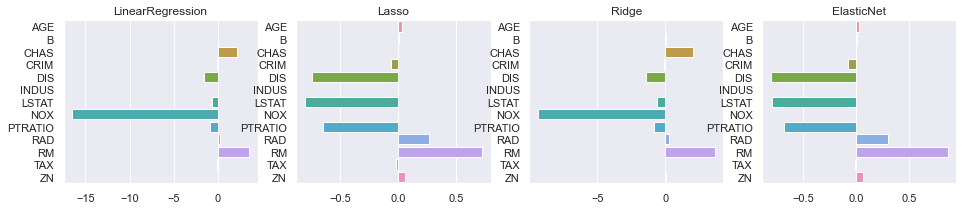

In [24]:
p,axes = plt.subplots(1,4,figsize=(16,3))

X= df[df.columns.difference(['price'])]
y= df["price"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model_list = [LinearRegression(),Lasso(),Ridge(),ElasticNet()]

for i,model in enumerate(model_list):
    model.fit(X_train,y_train)
    #print(model.coef_)
    #print(model.intercept_)
    axes[i].set_title(model.__class__.__name__)
    sns.set()
    sns.barplot(x=model.coef_,y=X.columns,ax=axes[i])

# model_listXGBRegressor(),LGBMRegressor()
# for model in model_list:
    

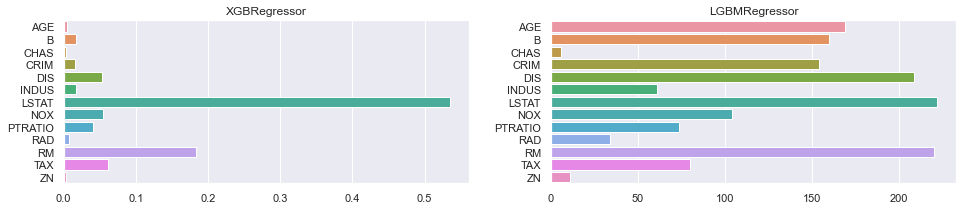

In [26]:
p,axes = plt.subplots(1,2,figsize=(16,3))
model_list = [XGBRegressor(),LGBMRegressor()]
for i,model in enumerate(model_list):
    model.fit(X_train,y_train)
    axes[i].set_title(model.__class__.__name__)
    sns.barplot(x=model.feature_importances_,y=X.columns,ax=axes[i])

### 규제
- lasso vs ridge ===> elasticnet
- XGBregressor
- lgbmregressor

- XGB regulation ? 구글링 
- lgbm regulation ?

<pre>
<b><font color=red>
class sklearn.linear_model.LinearRegression</b>(*, fit_intercept=True, normalize='deprecated',copy_X=True, n_jobs=None,positive=False)
<b><font color=red>
# L1규제
class sklearn.linear_model.Lasso</b>(alpha=1.0, *,fit_intercept=True, normalize='deprecated', precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
<b><font color=red>
# L2규제
class sklearn.linear_model.Ridge</b>(alpha=1.0, *, fit_intercept=True, normalize='deprecated',copy_X=True, max_iter=None, tol=0.001, solver='auto', positive=False, random_state=None)
<b><font color=red>
# L1규제(l1_ratio=0.5), L2규제
class sklearn.linear_model.ElasticNet</b>(alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, normalize='deprecated', precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

https://velog.io/@sset2323/05-08.-%ED%9A%8C%EA%B7%80-%ED%8A%B8%EB%A6%AC

<b> <font color='red'>
XGBRegressor는 회귀지만, 기본 원리는 트리로 작동함.
Scikit-Learn Wrapper interface for XGBoost.                      
#---------------  :: feature_importances_, feature_name_,  evals_result(), intercept_, coef_class xgboost.XGBRegressor(*, objective='reg:squarederror', **kwargs) </b>
max_depth: Optional[int] = None,
learning_rate: Optional[float] = None,      #---------(3)None
n_estimators: int = 100,                    #------------Default: 100
verbosity: Optional[int] = None,
objective: _SklObjective = None,     #---------(2)목적함수/평가메트릭
booster: Optional[str] = None,       #---------(1)gbtree, gblinear or dart.
tree_method: Optional[str] = None,
n_jobs: Optional[int] = None,
gamma: Optional[float] = None,
min_child_weight: Optional[float] = None,
max_delta_step: Optional[float] = None,
subsample: Optional[float] = None,
colsample_bytree: Optional[float] = None,
colsample_bylevel: Optional[float] = None,
colsample_bynode: Optional[float] = None,
reg_alpha: Optional[float] = None,     #---------(4)L1 regularization
reg_lambda: Optional[float] = None,    #---------(4)L2 regularization
scale_pos_weight:Optional[float] = None, #---Balancing of positive and negative weights.
base_score: Optional[float] = None,
random_state: Optional[Union[np.random.RandomState, int]] = None,  #---------------

missing: float = np.nan,
num_parallel_tree: Optional[int] = None,
monotone_constraints: Optional[Union[Dict[str, int], str]] = None,
interaction_constraints: Optional[Union[str, List[Tuple[str]]]] = None,  #---------(“gain”,"weight”,“cover”,“total_gain",“total_cover")
importance_type: Optional[str] = None,     #------For linear model, only “weight”(normalized coefficients without bias.)
gpu_id: Optional[int] = None,
validate_parameters: Optional[bool] = None,
predictor: Optional[str] = None,
enable_categorical: bool = False,
        
<b> <font color='red'>     
Scikit-Learn Wrapper interface for LGBMRegressor.  
#---------------  :: feature_importances_, feature_name_, evals_result_, best_score_
class lightgbm.LGBMRegressor(*args, **kwargs)  </b>
        boosting_type: str = 'gbdt',
        num_leaves: int = 31,
        max_depth: int = -1,
        learning_rate: float = 0.1,          #------------Default: 0.1 
        n_estimators: int = 100,             #------------Default: 100
        subsample_for_bin: int = 200000,
        objective: Optional[Union[str, Callable]] = None,  #--Default:‘regression’ 
        class_weight: Optional[Union[Dict, str]] = None,
        min_split_gain: float = 0.,
        min_child_weight: float = 1e-3,
        min_child_samples: int = 20,
        subsample: float = 1.,
        subsample_freq: int = 0,
        colsample_bytree: float = 1.,
        reg_alpha: float = 0.,              #---------L1 regularization
        reg_lambda: float = 0.,             #---------L2 regularization
        random_state: Optional[Union[int, np.random.RandomState]] = None,
        n_jobs: int = -1,
        silent: Union[bool, str] = 'warn',
        importance_type: str = 'split',      #---------split/gain
        

### Lasso VS Ridge 규제

#### Lasso > L1 규제
Lasso alpha = 0.4,0.6,0.8,1.0,1.5,2.0 변화에 따른 coef_값 변화

- Lasso: alpha값이 커지면 feature의 coef_값이 0에 수렴된다.
- 주요 feature만 가지고 학습한다. (주요하지 않은 feature는 배제(규제대상에서 제외))
https://tpwkcorqhd.tistory.com/30

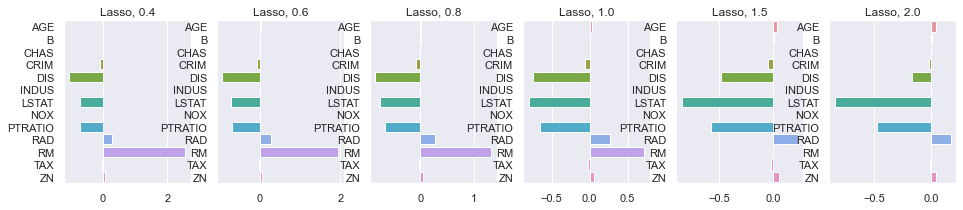

In [27]:
p,axes = plt.subplots(1,6,figsize=(16,3))
alpha_list = [0.4, 0.6, 0.8, 1.0, 1.5, 2.0]
for i in range(len(alpha_list)):
    model=Lasso(alpha=alpha_list[i])
    model.fit(X_train,y_train)
    axes[i].set_title(f"{model.__class__.__name__}, {alpha_list[i]}")
    sns.barplot(x=model.coef_,y=X.columns,ax=axes[i])

In [45]:
#Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

df = pd.read_csv("./gg_boston.csv")
X = df.drop(["price"], axis=1)
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=1234)

myparams = {'alpha':[0.4,0.6,0.8,1.0,1.5,2.0]}
gcv_model = GridSearchCV(Lasso(),cv=5,param_grid=myparams,refit=True)
gcv_model.fit(X_train,y_train)
pred=gcv_model.predict(X_test)
rmse=mean_squared_error(y_test,pred)
print(f'{rmse,gcv_model.best_params_,gcv_model.best_score_}')

(0.3550782846735614, {'alpha': 0.4}, 0.584641193805063)


In [47]:
model = Lasso()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mse = mean_squared_error(y_test, pred)
print(mse)

0.9962480553015514


In [46]:
model = Lasso(alpha=0.4)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mse = mean_squared_error(y_test, pred)
print(mse)

0.3550782846735614


#### Ridge > L2규제

- alpha가 커지면 feature의 coef_값이 0에 수렴한다 = feature의 영향력을 최소화한다.


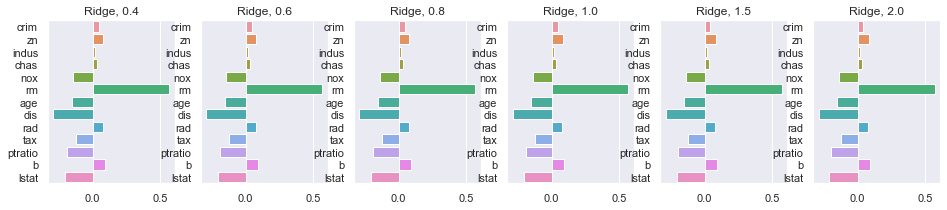

In [49]:
p, axes = plt.subplots(1,6, figsize=(16,3))
alpha_list= [0.4, 0.6, 0.8, 1.0, 1.5, 2.0]
for i in range(0,6):
    model = Ridge(alpha=alpha_list[i])
    model.fit(X_train, y_train)
    #print(model.coef_)
    axes[i].set_title(f"{model.__class__.__name__}, {alpha_list[i]}")
    sns.barplot(x=model.coef_,y=X.columns, ax=axes[i])